In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [7]:
df = pd.read_csv('Loan Approval Categorical Numerical Synthetic Dataset Binary Outcome.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df.head()

,Annual_Income,Credit_Score,Employment_Length,Age,Loan_Term,Loan_Purpose,Employment_Status,Loan_Categories,Region,Marital_Status,Approval_Probability
0,74944.814262,505.502450,14.599966,30,28,Personal,Self-employed,Medium,West,Married,1
1,144085.716769,483.101653,3.690240,44,14,Home,Employed,Small,South,Divorced,1
2,117839.273017,396.884652,6.932794,55,27,Home,Unemployed,Large,South,Single,0
3,101839.018104,633.996669,13.265613,50,1,Personal,Employed,Small,North,Divorced,1
4,48722.236853,562.143288,9.641787,23,28,Car,Self-employed,Small,South,Single,1


In [9]:
numerical_features = ['Annual_Income', 'Credit_Score', 'Employment_Length', 'Age', 'Loan_Term']
categorical_features = ['Loan_Purpose', 'Employment_Status', 'Loan_Categories', 'Region', 'Marital_Status']
target = 'Approval_Probability'
X = df[numerical_features + categorical_features]
y = df[target].astype(int)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_original = X_test.copy()  # Preserve the raw test set

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Annual_Income', 'Credit_Score',
                                  'Employment_Length', 'Age', 'Loan_Term']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Loan_Purpose', 'Employment_Status',
                                  'Loan_Categories', 'Region',
                                  'Marital_Status'])])

In [15]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [17]:
feature_names = preprocessor.get_feature_names_out()

In [19]:
feature_names

array(['num__Annual_Income', 'num__Credit_Score',
       'num__Employment_Length', 'num__Age', 'num__Loan_Term',
       'cat__Loan_Purpose_Car', 'cat__Loan_Purpose_Home',
       'cat__Loan_Purpose_Personal', 'cat__Employment_Status_Employed',
       'cat__Employment_Status_Self-employed',
       'cat__Employment_Status_Unemployed', 'cat__Loan_Categories_Large',
       'cat__Loan_Categories_Medium', 'cat__Loan_Categories_Small',
       'cat__Region_East', 'cat__Region_North', 'cat__Region_South',
       'cat__Region_West', 'cat__Marital_Status_Divorced',
       'cat__Marital_Status_Married', 'cat__Marital_Status_Single'],
      dtype=object)

In [21]:
X_train_transformed

array([[ 0.96505976, -1.22837193,  1.56292285, ...,  1.        ,
         0.        ,  0.        ],
       [-0.89007804, -0.86017655, -1.13171302, ...,  0.        ,
         1.        ,  0.        ],
       [-0.39062276, -0.57406153, -0.08030912, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.22855574, -1.21898579, -1.06084309, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.98143496,  1.53824822, -0.77347298, ...,  1.        ,
         0.        ,  0.        ],
       [-0.59877831, -0.03733579, -0.9954459 , ...,  0.        ,
         1.        ,  0.        ]])

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16), max_iter=1, warm_start=True, random_state=42)

In [25]:
epochs = 200

# 6. Perform training over 100 epochs.
# On the first call, use partial_fit with the classes parameter.
classes = np.unique(y_train)

for epoch in range(epochs):
    if epoch == 0:
        mlp.partial_fit(X_train_transformed, y_train, classes=classes)
    else:
        mlp.partial_fit(X_train_transformed, y_train)
    # Optionally, print epoch number and current loss value.
    print(f"Epoch {epoch+1:03d}, Loss: {mlp.loss_:.4f}")


Epoch 001, Loss: 0.5303
Epoch 002, Loss: 0.2230
Epoch 003, Loss: 0.1890
Epoch 004, Loss: 0.1839
Epoch 005, Loss: 0.1803
Epoch 006, Loss: 0.1778
Epoch 007, Loss: 0.1758
Epoch 008, Loss: 0.1741
Epoch 009, Loss: 0.1722
Epoch 010, Loss: 0.1706
Epoch 011, Loss: 0.1688
Epoch 012, Loss: 0.1671
Epoch 013, Loss: 0.1651
Epoch 014, Loss: 0.1635
Epoch 015, Loss: 0.1614
Epoch 016, Loss: 0.1594
Epoch 017, Loss: 0.1573
Epoch 018, Loss: 0.1552
Epoch 019, Loss: 0.1529
Epoch 020, Loss: 0.1505
Epoch 021, Loss: 0.1482
Epoch 022, Loss: 0.1454
Epoch 023, Loss: 0.1426
Epoch 024, Loss: 0.1399
Epoch 025, Loss: 0.1370
Epoch 026, Loss: 0.1338
Epoch 027, Loss: 0.1304
Epoch 028, Loss: 0.1270
Epoch 029, Loss: 0.1235
Epoch 030, Loss: 0.1198
Epoch 031, Loss: 0.1163
Epoch 032, Loss: 0.1127
Epoch 033, Loss: 0.1096
Epoch 034, Loss: 0.1062
Epoch 035, Loss: 0.1022
Epoch 036, Loss: 0.0998
Epoch 037, Loss: 0.0955
Epoch 038, Loss: 0.0914
Epoch 039, Loss: 0.0879
Epoch 040, Loss: 0.0844
Epoch 041, Loss: 0.0816
Epoch 042, Loss:

In [27]:
y_pred = mlp.predict(X_test_transformed)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy on test set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on test set: 0.8875

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       991
           1       0.89      0.89      0.89      1009

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Confusion Matrix:
 [[880 111]
 [114 895]]


In [31]:
X_test_original['Predicted_Approval'] = y_pred
print("\nRaw Test Data with Predictions:")
print(X_test_original.head())


Raw Test Data with Predictions:
      Annual_Income  Credit_Score  Employment_Length  Age  Loan_Term  \
6252   70497.245486    353.290689          19.378970   58          6   
4684  123060.635606    734.158798           3.902116   18         12   
1731  104867.500355    414.860361          19.787100   64         30   
4742   34270.827697    743.248106           2.564964   30         10   
4521   99254.049887    818.050800           7.095019   24         18   

     Loan_Purpose Employment_Status Loan_Categories Region Marital_Status  \
6252     Personal     Self-employed           Large  South         Single   
4684     Personal     Self-employed          Medium   East       Divorced   
1731     Personal     Self-employed           Large   West       Divorced   
4742     Personal        Unemployed           Small  North        Married   
4521          Car        Unemployed          Medium  South       Divorced   

      Predicted_Approval  
6252                   0  
4684             

In [33]:
X_test_original

,Annual_Income,Credit_Score,Employment_Length,Age,Loan_Term,Loan_Purpose,Employment_Status,Loan_Categories,Region,Marital_Status,Predicted_Approval
6252,70497.245486,353.290689,19.378970,58,6,Personal,Self-employed,Large,South,Single,0
4684,123060.635606,734.158798,3.902116,18,12,Personal,Self-employed,Medium,East,Divorced,1
1731,104867.500355,414.860361,19.787100,64,30,Personal,Self-employed,Large,West,Divorced,1
4742,34270.827697,743.248106,2.564964,30,10,Personal,Unemployed,Small,North,Married,0
4521,99254.049887,818.050800,7.095019,24,18,Car,Unemployed,Medium,South,Divorced,1
...,...,...,...,...,...,...,...,...,...,...,...
6412,132788.638642,689.483428,19.991968,80,21,Personal,Unemployed,Large,South,Married,1
8285,131675.609464,603.585807,19.152190,50,16,Personal,Unemployed,Small,North,Divorced,1
7853,65490.340154,554.791132,15.476016,65,28,Personal,Self-employed,Large,North,Married,1
1095,51183.363841,472.984665,0.199875,34,2,Personal,Unemployed,Large,West,Married,0


In [25]:
# X_test_original.to_csv('Statistical Dataset for Numerical and Categorical Features and Binary Outcome.csv', index=False)

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2

In [37]:
DV = 'Predicted_Approval'         # your binary outcome
cont_features = [
    'Annual_Income', 'Credit_Score',
    'Employment_Length', 'Age', 'Loan_Term'
]
cat_features = [
    'Loan_Purpose', 'Employment_Status',
    'Loan_Categories', 'Region', 'Marital_Status'
]
all_features = cont_features + cat_features


In [39]:
formula_full = (
    f"{DV} ~ " +
    " + ".join(cont_features + [f"C({c})" for c in cat_features])
)
full_model = smf.glm(
    formula_full,
    data=X_test_original,
    family=sm.families.Binomial()
).fit()

In [41]:
null_model = smf.glm(
    f"{DV} ~ 1",
    data=X_test_original,
    family=sm.families.Binomial()
).fit()

In [43]:
R2_full = 1 - full_model.llf / null_model.llf


In [45]:
results = []
for feat in all_features:
    # Build reduced formula without this feature (drop entire C() block for cats)
    if feat in cont_features:
        remaining = cont_features.copy()
        remaining.remove(feat)
        terms = remaining + [f"C({c})" for c in cat_features]
    else:
        # drop this categorical block
        terms = cont_features + [f"C({c})" for c in cat_features if c != feat]
    
    formula_reduced = f"{DV} ~ " + " + ".join(terms)
    reduced_model = smf.glm(
        formula_reduced,
        data=X_test_original,
        family=sm.families.Binomial()
    ).fit()
    
    # Likelihood‑Ratio Test for this feature
    LR_stat = 2 * (full_model.llf - reduced_model.llf)
    df_diff = int(full_model.df_model - reduced_model.df_model)
    p_val = chi2.sf(LR_stat, df_diff)
    
    # Partial McFadden’s R² effect size
    R2_reduced = 1 - reduced_model.llf / null_model.llf
    delta_R2 = R2_full - R2_reduced
    
    results.append({
        'feature': feat,
        'p_value': p_val,
        'effect_size_ΔMcF2': delta_R2
    })


In [47]:

results


[{'feature': 'Annual_Income',
  'p_value': 2.5526279474207977e-209,
  'effect_size_ΔMcF2': 0.3438366006379683},
 {'feature': 'Credit_Score',
  'p_value': 8.36687469361897e-154,
  'effect_size_ΔMcF2': 0.2517370098582844},
 {'feature': 'Employment_Length',
  'p_value': 0.004547851653401921,
  'effect_size_ΔMcF2': 0.0029038602460753626},
 {'feature': 'Age',
  'p_value': 0.5021931165816266,
  'effect_size_ΔMcF2': 0.00016241516132797784},
 {'feature': 'Loan_Term',
  'p_value': 0.002128600574310783,
  'effect_size_ΔMcF2': 0.003403116869413969},
 {'feature': 'Loan_Purpose',
  'p_value': 2.689318589224833e-45,
  'effect_size_ΔMcF2': 0.07403168430222995},
 {'feature': 'Employment_Status',
  'p_value': 8.80815821444321e-223,
  'effect_size_ΔMcF2': 0.368835140545117},
 {'feature': 'Loan_Categories',
  'p_value': 9.183718320936874e-147,
  'effect_size_ΔMcF2': 0.24256847495757783},
 {'feature': 'Region',
  'p_value': 0.22420586932909356,
  'effect_size_ΔMcF2': 0.0015760983200219236},
 {'feature': '

In [49]:
res_df = pd.DataFrame(results)
res_df = res_df.sort_values('effect_size_ΔMcF2', ascending=True)
print(res_df.to_string(index=False))

          feature       p_value  effect_size_ΔMcF2
              Age  5.021931e-01           0.000162
   Marital_Status  4.644956e-01           0.000553
           Region  2.242059e-01           0.001576
Employment_Length  4.547852e-03           0.002904
        Loan_Term  2.128601e-03           0.003403
     Loan_Purpose  2.689319e-45           0.074032
  Loan_Categories 9.183718e-147           0.242568
     Credit_Score 8.366875e-154           0.251737
    Annual_Income 2.552628e-209           0.343837
Employment_Status 8.808158e-223           0.368835


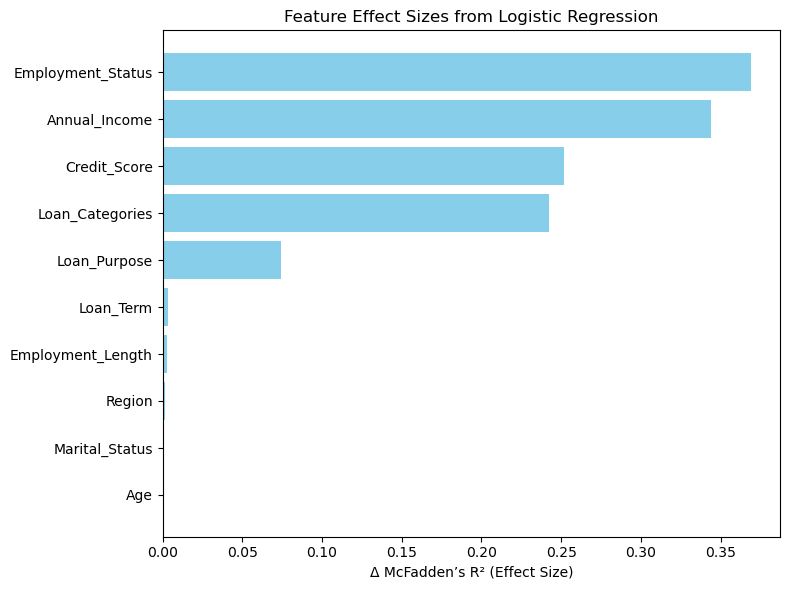

In [51]:
plt.figure(figsize=(8, 6))
plt.barh(res_df['feature'], res_df['effect_size_ΔMcF2'], color='skyblue')
plt.xlabel('Δ McFadden’s R² (Effect Size)')
plt.title('Feature Effect Sizes from Logistic Regression')
plt.tight_layout()
plt.show()

In [53]:
def compute_metrics(GT, R):
    # True Positives, False Positives, False Negatives
    TP = GT & R
    FP = R - GT
    FN = GT - R
    
    # Counts
    tp, fp, fn = len(TP), len(FP), len(FN)
    
    # Metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / len(GT) if len(GT) > 0 else 0
    fdr = fp / (tp + fp) if (tp + fp) > 0 else 0
    
    return {
        'TP': TP, 'FP': FP, 'FN': FN,
        'Precision': precision,
        'Recall': recall,
        'FDR': fdr
    }


GT = {"annual_income", "credit_score","Employment_Status","Loan_Categories","Loan_Purpose"}
R  = {"annual_income",
        "Employment_Status",
        "credit_score",
        "Loan_Categories",
        "Loan_Purpose",
        "Loan_Term",
     "Employment_Length"}


# if __name__ == "__main__":
#     # Example:
#     GT = {"annual_income", "credit_score", "debt_to_income","Employment_Status","Loan_Categories","Loan_Purpose"}
#     ranking = [
#         "annual_income",
#         "Employment_Status",
#         "credit_score",
#         "Loan_Categories",
#         "Loan_Purpose",
#         "Loan_Term"
#     ]
#     flagged = ranking[:3]  # e.g. top‑3 features

#     df_metrics = compute_feature_recovery_metrics(GT, flagged, ranking)
#     df_metrics.insert(0, "Method", "SHAP-XAI")
#     df_metrics = df_metrics[["Method", "Precision", "Recall", "FDR", "Top-1 Match"]]
#     print(df_metrics.to_string(index=False))

In [55]:
metrics = compute_metrics(GT, R)

In [57]:

print("True Positives (TP):", metrics['TP'])
print("False Positives (FP):", metrics['FP'])
print("False Negatives (FN):", metrics['FN'])
print(f"Precision: {metrics['Precision']:.3f}")
print(f"Recall:    {metrics['Recall']:.3f}")
print(f"FDR:       {metrics['FDR']:.3f}")

True Positives (TP): {'credit_score', 'Loan_Categories', 'Loan_Purpose', 'annual_income', 'Employment_Status'}
False Positives (FP): {'Loan_Term', 'Employment_Length'}
False Negatives (FN): set()
Precision: 0.714
Recall:    1.000
FDR:       0.286


In [20]:
import shap
import numpy as np
import psutil

In [91]:
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)


In [103]:
explainer = shap.Explainer(
    lambda x: mlp.predict_proba(x)[:,1],
    X_train_transformed
)


In [105]:
batch_size = 2000
all_shap = []



In [107]:
for start in range(0, X_test_transformed.shape[0], batch_size):
    end = min(start + batch_size, X_test_transformed.shape[0])
    sb = explainer(X_test_transformed[start:end])
    all_shap.append(sb.values)


PermutationExplainer explainer: 2001it [00:55, 29.40it/s]                       


In [109]:
# all_shap_values = np.vstack(all_shap_values) 
all_shap_values = np.vstack(all_shap)

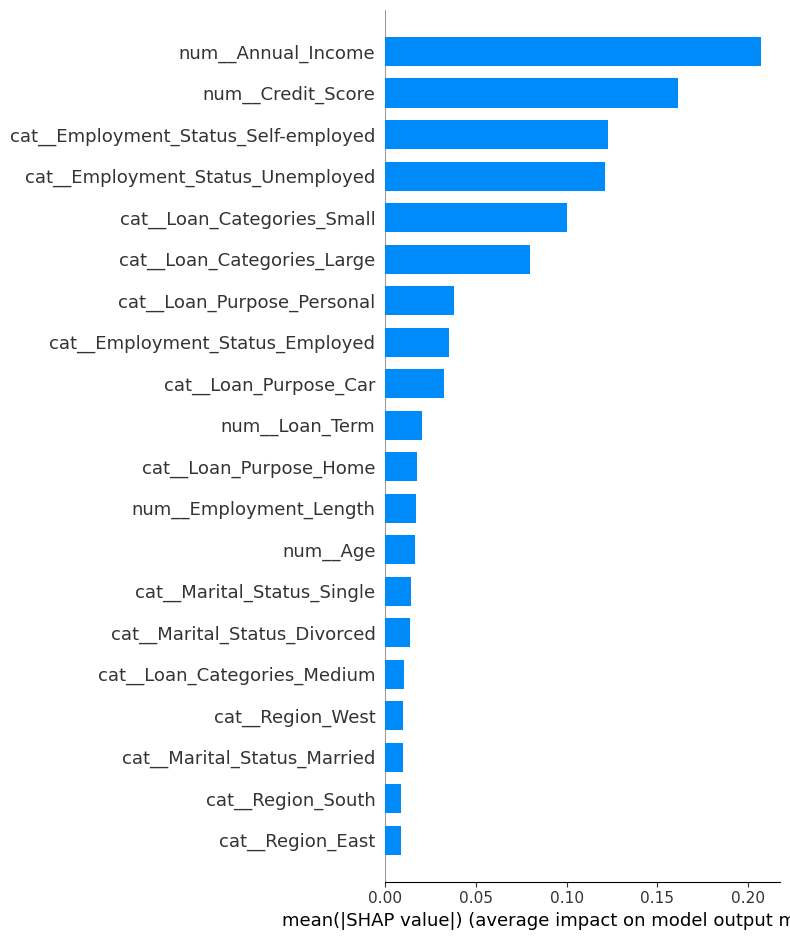

In [112]:
plt.figure(figsize=(6,4))
shap.summary_plot(
    all_shap_values,
    X_test_df,
    feature_names=feature_names,
    plot_type="bar",
    show=False
)

In [122]:
orig_mapping = {}
for name in feature_names:
    typ, rest = name.split("__", 1)
    if typ == "num":
        parent = rest               # e.g. 'Annual_Income'
    else:  # typ == "cat"
        # drop the level suffix after the last '_'
        parent = rest.rsplit("_", 1)[0]  # e.g. 'Loan_Purpose' from 'Loan_Purpose_Car'
    orig_mapping[name] = parent

# 2) Compute mean absolute SHAP per transformed feature
mean_abs = pd.Series(
    np.abs(all_shap_values).mean(axis=0),
    index=feature_names
)

# 3) Aggregate to the 10 original features
#    by summing across all transformed columns that map to each parent
mean_orig = mean_abs.groupby(orig_mapping).sum()
mean_orig = mean_orig.reindex(numerical_features + categorical_features)  # optional ordering
mean_orig_sorted = mean_orig.sort_values(ascending=False)

print("Mean |SHAP| by original feature:")
print(mean_orig_sorted)


Mean |SHAP| by original feature:
Employment_Status    0.278760
Annual_Income        0.207190
Loan_Categories      0.190250
Credit_Score         0.161294
Loan_Purpose         0.088302
Marital_Status       0.038122
Region               0.036046
Loan_Term            0.020101
Employment_Length    0.016773
Age                  0.016530
dtype: float64


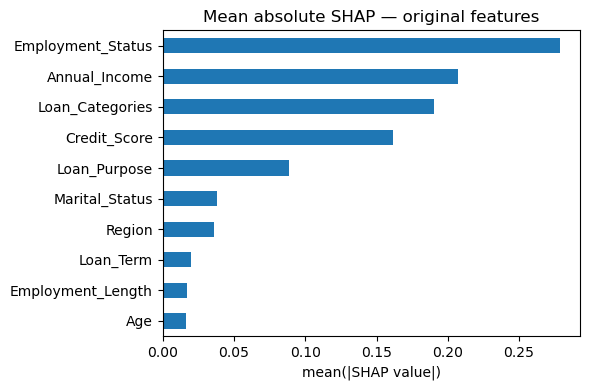

In [130]:
import os

os.makedirs("shap", exist_ok=True)
plt.figure(figsize=(6,4))
mean_orig_sorted.plot.barh()
plt.xlabel("mean(|SHAP value|)")
plt.title("Mean absolute SHAP — original features")
plt.gca().invert_yaxis()
plt.tight_layout()
out_path = os.path.join("shap", "numerical categorical_classification_test_shap_summary.jpg")
plt.savefig(out_path, format="jpg", dpi=300)
plt.show()

In [126]:
def compute_metrics(GT, R):
    # True Positives, False Positives, False Negatives
    TP = GT & R
    FP = R - GT
    FN = GT - R
    
    # Counts
    tp, fp, fn = len(TP), len(FP), len(FN)
    
    # Metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / len(GT) if len(GT) > 0 else 0
    fdr = fp / (tp + fp) if (tp + fp) > 0 else 0
    
    return {
        'TP': TP, 'FP': FP, 'FN': FN,
        'Precision': precision,
        'Recall': recall,
        'FDR': fdr
    }


GT = {"annual_income", "credit_score","Employment_Status","Loan_Categories","Loan_Purpose"}
R  = {"Employment_Status",
        "Annual_Income",
        "Loan_Categories",
        "Credit_Score",
        "Loan_Purpose",
        "Marital_Status",
    "Region",
     "Loan_Term",
    "Employment_Length",
     "Age"}



In [128]:
metrics = compute_metrics(GT, R)
print("True Positives (TP):", metrics['TP'])
print("False Positives (FP):", metrics['FP'])
print("False Negatives (FN):", metrics['FN'])
print(f"Precision: {metrics['Precision']:.3f}")
print(f"Recall:    {metrics['Recall']:.3f}")
print(f"FDR:       {metrics['FDR']:.3f}")

True Positives (TP): {'Loan_Categories', 'Employment_Status', 'Loan_Purpose'}
False Positives (FP): {'Employment_Length', 'Annual_Income', 'Marital_Status', 'Loan_Term', 'Credit_Score', 'Age', 'Region'}
False Negatives (FN): {'credit_score', 'annual_income'}
Precision: 0.300
Recall:    0.600
FDR:       0.700
